In [ ]:
# !pip install llama_index
# !pip install llama-index-embeddings-huggingface ##用于tokenembeding

### Basic workfolw
Storing可以干几件事  
-文档储存（Document stores）  
-索引储存（Index stores）  
-向量储存（Vector stores）  
-图储存（Graph stores）  
-聊天储存（Chat stores）  

重点：  
-storage context()可以理解为一个容器，用于储存node、index、vector。  
它包含以下几个参数可以自定义：   
-docstore：BaseDocumentStore   
-index_store：BaseIndexStore   
-vector_store：VectorStore   
-graph_store：GraphStore  
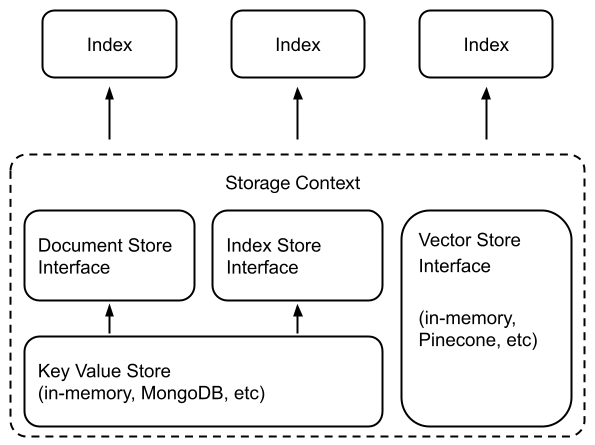

### 1.vectorstore

In [ ]:
# https://docs.llamaindex.ai/en/stable/module_guides/storing/vector_stores/
# 常用的比如Chroma、Neo4j以及Qdrant，一下以Qdrant为例

In [ ]:
# !pip install -U qdrant_client ##安装Qdrant数据库
# !pip install llama-index-vector-stores-qdrant ##安装qdrant的llamaindex包

In [5]:
import logging
import sys
import os

import qdrant_client
from IPython.display import Markdown, display
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import StorageContext
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

Settings.embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
from llama_index.core import Document
document1 = Document(
    text="This is a super-customized document",
    metadata={
        "file_name": "super_secret_document.txt",
        "category": "finance",
        "author": "LlamaIndex"})
document2 = Document(
    text="Hello world!",
    metadata={
        "file_name": "computersss.txt",
        "category": "RAG",
        "author": "Human"})
##或者这样写，把多个document用[.. , ..]连接
documents = [document1, document2]
documents

[Document(id_='9b72f2cb-faab-4041-8a0d-fc1784b7d7c5', embedding=None, metadata={'file_name': 'super_secret_document.txt', 'category': 'finance', 'author': 'LlamaIndex'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='This is a super-customized document', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(id_='4598dd45-d050-4eac-935c-4f47964c3e89', embedding=None, metadata={'file_name': 'computersss.txt', 'category': 'RAG', 'author': 'Human'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Hello world!', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n')]

In [7]:
##可以使用“：memory"做测试，数据会保存为缓存
##可以自定义path，保存在文件夹里面
client = qdrant_client.QdrantClient(
    # location=":memory:",
    path='/content/test'
)

In [9]:
vector_store = QdrantVectorStore(client=client, collection_name="AABB")
storage_context = StorageContext.from_defaults(vector_store=vector_store)

##从document建立索引indexing
index = VectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

In [11]:
index.index_struct

IndexDict(index_id='4979f44c-4e6c-4088-9472-f64061aaf241', summary=None, nodes_dict={}, doc_id_dict={}, embeddings_dict={})

In [15]:
text='\nContext\nLLMs are a phenomenal piece of technology for knowledge generation and reasoning.\nThey are pre-trained on large amounts of publicly available data.\nHow do we best augment LLMs with our own private data?\nWe need a comprehensive toolkit to help perform this data augmentation for LLMs.\n\nProposed Solution\nThat\'s where LlamaIndex comes in. LlamaIndex is a "data framework" to help\nyou build LLM  apps. It provides the following tools:\n\nOffers data connectors to ingest your existing data sources and data formats\n(APIs, PDFs, docs, SQL, etc.)\nProvides ways to structure your data (indices, graphs) so that this data can be\neasily used with LLMs.\nProvides an advanced retrieval/query interface over your data:\nFeed in any LLM input prompt, get back retrieved context and knowledge-augmented output.\nAllows easy integrations with your outer application framework\n(e.g. with LangChain, Flask, Docker, ChatGPT, anything else).\nLlamaIndex provides tools for both beginner users and advanced users.\nOur high-level API allows beginner users to use LlamaIndex to ingest and\nquery their data in 5 lines of code. Our lower-level APIs allow advanced users to\ncustomize and extend any module (data connectors, indices, retrievers, query engines,\nreranking modules), to fit their needs.\n'

In [30]:
from llama_index.core.node_parser import SentenceSplitter
node_parser = SentenceSplitter(chunk_size=100, chunk_overlap=20)
nodes = node_parser.get_nodes_from_documents([Document(text=text,metadata={"filename":"bbb","categery":"kkk"})], show_progress=False)
nodes

[TextNode(id_='b0623b05-cccf-4e04-91b2-8e3ca52f3602', embedding=None, metadata={'filename': 'bbb', 'categery': 'kkk'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='db2aee6a-d9d7-422f-a6bd-ce1a1ce08b9b', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'filename': 'bbb', 'categery': 'kkk'}, hash='edf487fd1b23742386da2062ee4659ce003e58bf03d2f92904df91fc9173234c'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='85302f25-975d-4b1d-b53d-5e80795a3590', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='3dc54efeec4ccd8acfddbd6ca573cec713f9a344a7a5b6c95f2b34142a3ebd7b')}, text="Context\nLLMs are a phenomenal piece of technology for knowledge generation and reasoning.\nThey are pre-trained on large amounts of publicly available data.\nHow do we best augment LLMs with our own private data?\nWe need a comprehensive toolkit to help perform this data augmentation for LLMs.\n\nProposed Solution\nThat'

In [31]:
vector_store = QdrantVectorStore(client=client, collection_name="CCDD")
storage_context = StorageContext.from_defaults(vector_store=vector_store)
##从node建立索引indexing
index = VectorStoreIndex(
    nodes,
    storage_context=storage_context,
)
index.index_struct

IndexDict(index_id='0b0751aa-98e5-44fd-9519-6f16aea9fda5', summary=None, nodes_dict={}, doc_id_dict={}, embeddings_dict={})

In [34]:
##弄个简单的retriever
re_engine = index.as_retriever()
response = re_engine.retrieve(
    "What is llama index?"
)

In [35]:
response ##返回chunk/nodes+score（基于余弦相似度）

[NodeWithScore(node=TextNode(id_='85302f25-975d-4b1d-b53d-5e80795a3590', embedding=None, metadata={'filename': 'bbb', 'categery': 'kkk'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='db2aee6a-d9d7-422f-a6bd-ce1a1ce08b9b', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'filename': 'bbb', 'categery': 'kkk'}, hash='edf487fd1b23742386da2062ee4659ce003e58bf03d2f92904df91fc9173234c'), <NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(node_id='b0623b05-cccf-4e04-91b2-8e3ca52f3602', node_type=<ObjectType.TEXT: '1'>, metadata={'filename': 'bbb', 'categery': 'kkk'}, hash='0459096dbadb68742b8a13bda3d5101ee8522e10a6a02689ffccac931f492d0b'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='285640dc-99f3-4085-88a2-fb0a95bc0947', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='d716037e18a2995ca34bb822377c4879e0d6c1fba2547f745669c9517ead636a')}, text='Proposed Solution\nThat\'s where LlamaIndex comes

### 2. Customizing Storage

In [ ]:
# By default, LlamaIndex hides away the complexities
# and let you query your data in under 5 lines of code:

from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader("你的data").load_data()
index = VectorStoreIndex.from_documents(documents)
query_engine = index.as_query_engine() ##需要设置一下OpenAI账号 or 使用本地llm
response = query_engine.query("Summarize the documents.")

In [ ]:
from llama_index.core.storage.docstore import SimpleDocumentStore
from llama_index.core.storage.index_store import SimpleIndexStore
from llama_index.core.vector_stores import SimpleVectorStore
from llama_index.core.node_parser import SentenceSplitter

# create parser and parse document into nodes
parser = SentenceSplitter()
nodes = parser.get_nodes_from_documents(documents)

# create storage context using default stores
storage_context = StorageContext.from_defaults(
    docstore=SimpleDocumentStore(),
    vector_store=SimpleVectorStore(),
    index_store=SimpleIndexStore(),
)

# create (or load) docstore and add nodes
storage_context.docstore.add_documents(nodes) ##你可以使用上面提供的很多数据库

# build index
index = VectorStoreIndex(nodes, storage_context=storage_context)

# save index ##这一步是把索引永久化
index.storage_context.persist(persist_dir="<persist_dir>")

# can also set index_id to save multiple indexes to the same folder
index.set_index_id("<index_id>")
index.storage_context.persist(persist_dir="<persist_dir>")

# to load index later, make sure you setup the storage context
# this will loaded the persisted stores from persist_dir
storage_context = StorageContext.from_defaults(persist_dir="<persist_dir>")

# then load the index object
from llama_index.core import load_index_from_storage

loaded_index = load_index_from_storage(storage_context)

# if loading an index from a persist_dir containing multiple indexes
loaded_index = load_index_from_storage(storage_context, index_id="<index_id>")

# if loading multiple indexes from a persist dir
loaded_indicies = load_index_from_storage(
    storage_context, index_ids=["<index_id>", ...]
)

In [ ]:
from llama_index.core.storage.docstore import SimpleDocumentStore
from llama_index.core.storage.index_store import SimpleIndexStore
from llama_index.core.vector_stores import SimpleVectorStore
from llama_index.core import StorageContext

# create storage context using default stores
storage_context = StorageContext.from_defaults(
    docstore=SimpleDocumentStore(),
    vector_store=SimpleVectorStore(), ##vector_store可以储存很多类型，比如image（使用clip编码）
    index_store=SimpleIndexStore(),
)

In [ ]:
# 参考https://docs.llamaindex.ai/en/stable/module_guides/storing/customization/